# Punto 1

a) Los 3 objetos que se tomaron en cuenta fueron principalemente un bote, una figura de acción y control de xbox pero también se agregaron gadllets y un cubo de plastico para su procesamiento y clasificación.
b) Los codigos implementados ya poseen la opcion de utilizar la camara para que en base a las imagenes las classifique, no deje las clases como tal y solo las imagenes individuales apra ver a cual de todas las opciones se podría asemejar más. Gracias a esto con el caso del bote note que tenia varias formas de hacerlo y se vei en varias partes mejor. (si es posible se anexará video)
3)El descriptor que mejor me funcionó fue con ORB, seguido de SIFt y al ultimo HOG sin embargo se que con HOG al usar SVM (Support Vector mAchines) es mas eficiente y más rapido, pero a fuerza bruta es muy lento por no decir inutil, no logra procesar el frame (cuadro) a tiempo para clasificarlo. 


## Ejemplos

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

### ORB

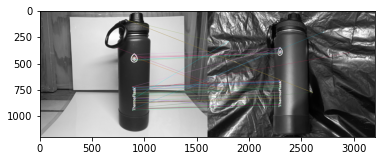

(<matplotlib.image.AxesImage at 0x1db2899dda0>, None)

In [7]:
img1 = cv2.imread('../Images/train/bottle/bottle_1.jpg')  
img2 = cv2.imread('../Images/test/bottle/bottle_1.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.ORB_create(nfeatures=1000)

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
imgORB = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

### HOG

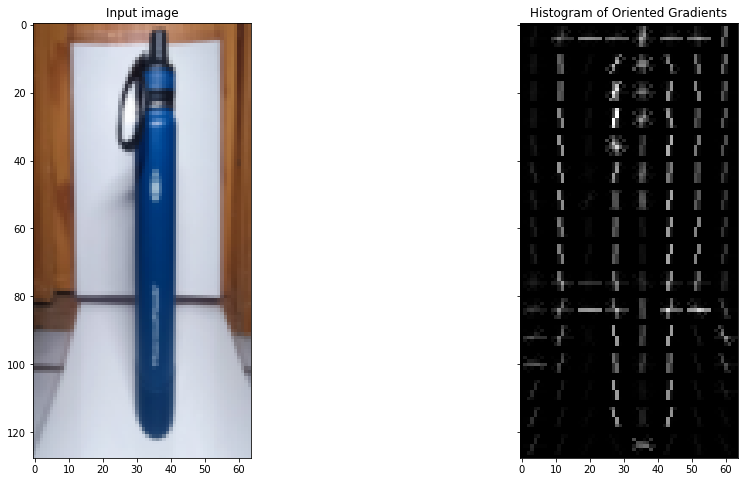

In [12]:
img = imread('../ORB_img/ImagesQuery/bottle_1.jpg')
resized_img = resize(img, (128,64))
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')
#imgHOG = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
plt.show()

### SIFT

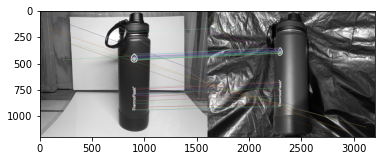

(<matplotlib.image.AxesImage at 0x1db28acbbe0>, None)

In [9]:
img1 = cv2.imread('../Images/train/bottle/bottle_1.jpg')  
img2 = cv2.imread('../Images/test/bottle/bottle_1.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create(nfeatures=1000)

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
imgSIFT = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

#### TABLA & Resultados
Lo principal es que se anexarón videos sobre su uso donde por la luz me parece que no logre que sift pudiera clasificar, sin mencionar que la aplicación por fuerza bruta es muy lenta y direcatamente no es recomendable, donde si sería recomandable su implementacion con SVM.
Recapitulando que es mejor ORB, SIFT y HOG.

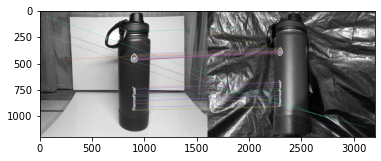

(<matplotlib.image.AxesImage at 0x1db3d7c37f0>, None)

In [11]:
#SIFT
imgSIFT = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(imgSIFT),plt.show()

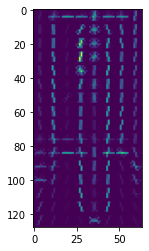

In [15]:
#HOG
ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')
imgHOG = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
plt.imshow(imgHOG)

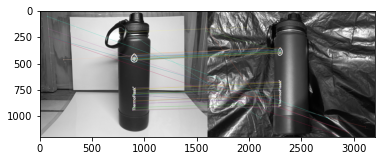

(<matplotlib.image.AxesImage at 0x1db3f46ecc0>, None)

In [16]:
#ORB
imgORB = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(imgORB),plt.show()

# Punto 2

# Planteamiento del problema a resover
Mi entender fue que se requeria clasificar una imagen obtenida en este caso desde la cmara de vídeo, por lo que se recurrio a buscar descriptores que puedieran en base a imagenes de entrenamiento o de referencia, clasificar lo que tenian enfrente o en este caso los diferentes objetos que se lograban identificar en la imagen. Por lo mismo se busco cubrir varios angulos de los objetos ddurante su 'muestre' que es para obtener la mejor cantidad de datos de las imagenes, en este caso los objetos.

# Descripción de la solución. 
Se implementaron los diferentes descriptores que cumplieran mas de un pocentaje respecto a la similitud con una imagen. Los descriptores utilizados y su codigo son los siguientes:
## SIFT 
<pre lang="python">
img1 = cv2.imread('../Images/train/bottle/bottle_1.jpg')  
img2 = cv2.imread('../Images/test/bottle/bottle_1.jpg') 
  #Leemos las imagenes desde nuestros directorios de prueba y testeo

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  #Convertirmos sus escalas de colores a una de escala de grises

sift = cv2.xfeatures2d.SIFT_create(nfeatures=1000)
  #Creamos al descriptor que extraerá las caracteristicas de cada image para relacionarlas

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
  #Le asamos las imagenes que describira donde mostrara los puntos de interes y arreglos(matrices) por parte del descriptor

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
  #Aqui se unen los puntos de interes junto con las imagenes de testeo y entrenamiento

matches = bf.match(descriptors_1,descriptors_2)
  #Se unen con referencia de los descripores de entrenamiento y test
matches = sorted(matches, key = lambda x:x.distance)
  #Busca ordenarlos en base a los mas significativos

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
  #Guarda el resultado en una imagen que contiene la imagen de train y una de test donde se pueden ver los puntos de coincidencia de caracteristicas y donde se describen 
plt.imshow(img3),plt.show()
</pre>

## HOG
<pre lang="python">
img = imread('../ORB_img/ImagesQuery/bottle_1.jpg')
  #Se lee la imagen desde el directorio

resized_img = resize(img, (128,64))
  #Redimensionamiento de imagenes para homogenisar los datos a uno donde los gradientes sean mas claros

fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
  #Aqui calculamos el histograma, dando como referencia, orientations que es el numero de bins lo cual ayuda con la clasificación pero aumenta el tamaño del histograma, pixels_per_cell el numero o tamaño de las celdas para la varianza, cells_per_block donde es el tamaño de vecindario para la normalizacion vizualize para visualizar, se asume que el multichannel es requerido pero tambien se puede eliminar para una mejor compatibilidad. Obtenemos fd, un vector unidemnsional que tiene las caracteristicas de HOG, de estos datos nosotros describimos y hog_image es la imagen de hog.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 
  #Esta parte es mas para visualizacion en x y y donde podria verse la respresentación

ax1.imshow(resized_img, cmap=plt.cm.gray) 
  #se muestra la imagen de origen
ax1.set_title('Input image') 
  #agrega titulo

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
  #Se rescala el histograma para una mejor visualización

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
  #Se muestra el histograma en una imagen bi-dimensional
ax2.set_title('Histogram of Oriented Gradients')
</pre>

## ORB
<pre lang="python">
img1 = cv2.imread('../Images/train/bottle/bottle_1.jpg')  
img2 = cv2.imread('../Images/test/bottle/bottle_1.jpg') 
  #Leemos la imagen de referencia y la de prueba de sus respectivos directorios.

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  #Convertimos ambas imagenes a escala de grises

#sift
sift = cv2.ORB_create(nfeatures=1000)
  #Se crea el descriptor ORB y además se le pide que sean 1000 caracteristicas las que detecte/separe.

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
  #obtenemos los puntos de interes y los descriptores de las imagenes

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
  #Unimos los puntos de interes por medio de fuerza bruta, especificando la distancia y permitiendo el crosschecking

matches = bf.match(descriptors_1,descriptors_2)
  #Se encuentran los puntos de interes relacionados por parte de los 2 descriptores y se almacenan
matches = sorted(matches, key = lambda x:x.distance)
  #Se ordenan los puntos encontrados con la menor distancia posible entre ellos

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
  #Se muestra de manera grafica la figura origen, los puntos de interes y la figura 2 junto con los puntos interes y su union entre las imagenes
plt.imshow(img3),plt.show()
</pre>

# Descripción de los resultados
Los principales retos fueron tneer una base de datos descente para la obtención de la clasifiación en base a los mismos, por lo mismo HOG creo no me fue facíl implementarlo, al basrse en los gradientes tengo algunas figuras que se asemejan como el flipper y minecraft que si se clasifican unicamente por sus gradientes pueden ser muy similares  más si se redimensiona la imagen a una mas alta y de menor anchura.

mis mejores resultados fueron con SIFT y ORB sobre todo en las texturas y objetos de gran area (regulares), ya que objetos mas compeljos se confucndian parcialemente con el ruido de fondo o formas del fondo mismo (como se puede ver en los videos de cada descriptor), mi sugerencia sería entender cuando es aplicable cada uno ya que por ejemplo si es muy probable se de en un entorno muy controlado con ORB es mas que suficiente ya que es facil y rapido de implementar, sin mencionar que la base de datos para su correcta implementación sería pequeña y HOG definitivamente solo con SVM por su velocidad una vez ya esta entrenado el modelo con sus respectivas clases.

# Discusión.
Durante la investigación vi que se HOG es el mejor cuando se busca su clasificación por medio se Support ector machines gracias a su velocidad y que estaria previiamente entreneada por lo que no busca en su 'base de datos' y luego busca y compara, directamente ya solo busca y compara, lo que disminuye la cantidad de tiempo a utilizar y procesamiento. Despues le seguiria ORB a mi parecer, ya que es con el que tuve una mejor cantidad de aciertos y solides al momento de tener ruido en la imagen.

# Conclusión.
En conclusión, esta actividad me fue mu util para identificar como utilizar los descriptores y que no necesariamente es algo poco factible, lo que si es requerido es conocer la sintaxis, que parametros incluir y cuales no, asi como el como utilizar los descripotres ya que su creacion se hace en una o dos líneas, pero su implementación visual (es decir no solo del computador) es muchisimo mas compleja de lo que esperaba. Sin mencionar que muchos descriptores no funcionarian con objetos que sean muy similares entre si como lo podrían ser los termos donde sería requerido calcular mas caracteristicas o utilizar redes neuronales.

###### Nota
- Cada descriptor tiene referencias de donde tome inspiración, codigo o una idea.
- Además se dejan las imagenes de entreanamiento asi como los videos de prueba de cada descriptor.